In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import json

In [2]:
with open("TinySOL_helicality.json", "r") as f:
    helicality_dict = json.load(f)

my_dict = dict(helicality_dict)
del my_dict[""]

list(my_dict.items())

[('Hn', 0.9413691704008995),
 ('Acc', 0.5798071449405824),
 ('Va', 0.4315489988550756),
 ('Vn', 0.4310324896428347),
 ('BTb', 0.4211847828751676),
 ('Ob', 0.40129740419716403),
 ('ASax', 0.3897747240921105),
 ('Cb', 0.3882857492406281),
 ('Bn', 0.369578022220839),
 ('Tbn', 0.36322483202811023),
 ('Vc', 0.3503304589851143),
 ('TpC', 0.3425367938598807),
 ('Fl', 0.32551500177602005),
 ('ClBb', 0.26803722371730365)]

In [3]:
instr_list=["Horn", "Accordion", "Viola", "Violin", "Bass Tuba", "Oboe", "Alto Saxophone", "Contrabass",
            "Bassoon", "Trombone", "Violoncello", "Trumpet in C", "Flute", "Clarinet in Bb"]

In [4]:
instr_list

['Horn',
 'Accordion',
 'Viola',
 'Violin',
 'Bass Tuba',
 'Oboe',
 'Alto Saxophone',
 'Contrabass',
 'Bassoon',
 'Trombone',
 'Violoncello',
 'Trumpet in C',
 'Flute',
 'Clarinet in Bb']

In [5]:
list(my_dict.values())

[0.9413691704008995,
 0.5798071449405824,
 0.4315489988550756,
 0.4310324896428347,
 0.4211847828751676,
 0.40129740419716403,
 0.3897747240921105,
 0.3882857492406281,
 0.369578022220839,
 0.36322483202811023,
 0.3503304589851143,
 0.3425367938598807,
 0.32551500177602005,
 0.26803722371730365]

In [6]:
df_helicality = pd.DataFrame({"instrument":instr_list,
                            "helicality":list(my_dict.values())})

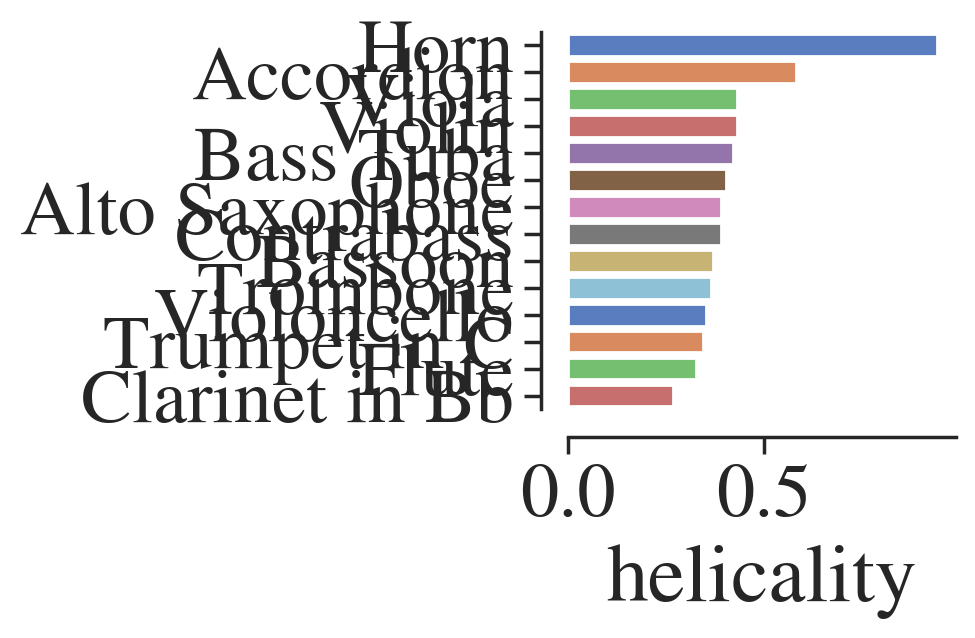

In [81]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=200)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
sns.axes_style(style='ticks')
sns.barplot(x=df_helicality.columns[1], y=df_helicality.columns[0], data=df_helicality, palette="muted")
ax.set_ylabel("")
# ax.set_yticks([])
sns.despine(offset=10)


# plt.savefig("TinySOL_barplot.pdf", bbox_inches='tight')

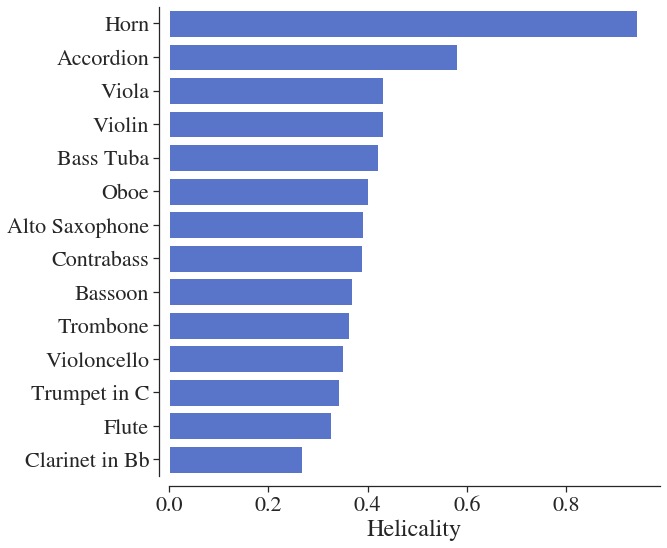

In [87]:
# fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=200)
# matplotlib.rcParams['mathtext.fontset'] = 'stix'

sns.set(font_scale=2, rc={"figure.figsize":(2.5,2.5)})
sns.set_style(style="ticks", rc={"mathtext.fontset":"stix", "font.family":"STIXGeneral",
                                 "figure.figsize":(2.5,2.5)})                                 
g = sns.catplot(y="instrument", x="helicality",

                data=df_helicality, saturation=0.7,

                kind="bar", ci=None, aspect=1.25, height=8,
                
                color="royalblue")

(g.set_axis_labels("Helicality", "")

  .despine(offset=10)) 

plt.savefig("TinySOL_barplot_v4.pdf", dpi=200)

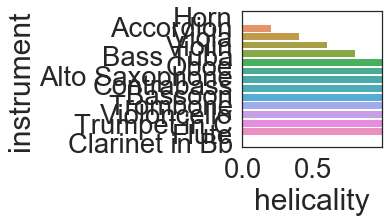

In [82]:
sns.set_style("white", rc={"figure.figsize":(5,5)})
ax = sns.barplot(x="helicality", y="instrument", data=df_helicality)

# Set these based on your column counts
columncounts = 20*np.arange(14)

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(ax.patches,widthbars):
    x = bar.get_y()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_y(centre-newwidth/2.)
    bar.set_width(newwidth)

plt.show()